In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top                     No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

In [4]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Berdasarkan profiling diatas, terdapat beberapa masalah antara lain 
    1. TotalCharges merupakan variable categorical dimana seharusnya merupakan variable numerik
    2. TotalCharges memiliki beberapa data kosong
    3. SeniorCitizen lebih baik untuk dijadikan variable boolean

In [7]:
#Memperbaiki kolom TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
df = df.replace(np.nan, 0, regex=True)
#Memperbaiki kolom SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].astype('bool')

df.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
#Outlier check pada 3 variable numerik (Tenure, MonthlyCharges, TotalCharges)
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

print(detect_outlier(df['tenure']))
print(detect_outlier(df['MonthlyCharges']))
print(detect_outlier(df['TotalCharges']))

[]
[]
[]


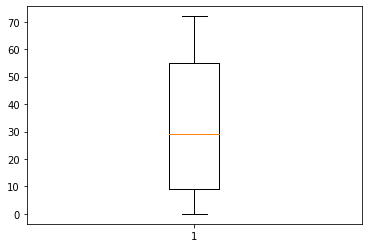

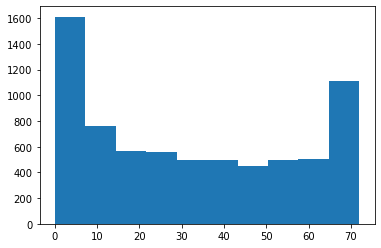

In [16]:
#Boxplot Outlier and Data Distribution Check (tenure)
%matplotlib inline
plt.boxplot(df['tenure'])
plt.show()
plt.hist(df['tenure'])
plt.show()

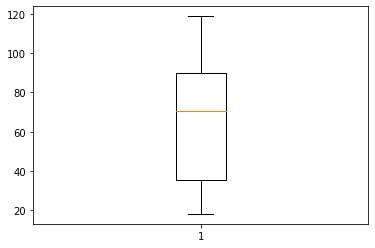

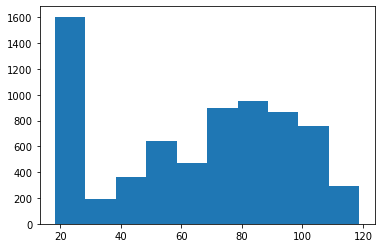

In [15]:
#Boxplot Outlier and Data Distribution Check (MonthlyCharges)
%matplotlib inline
plt.boxplot(df['MonthlyCharges'])
plt.show()
plt.hist(df['MonthlyCharges'])
plt.show()

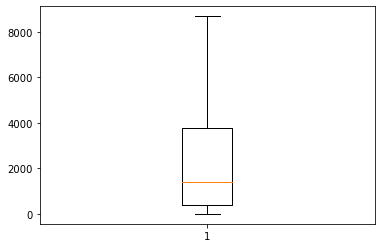

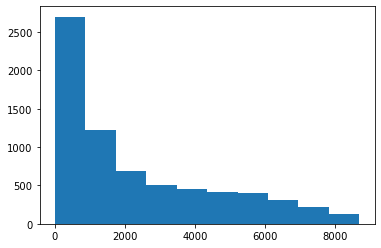

In [14]:
#Boxplot Outlier and Data Distribution Check (TotalCharges)
%matplotlib inline
plt.boxplot(df['TotalCharges'])
plt.show()
plt.hist(df['TotalCharges'])
plt.show()

# Berdasarkan gambaran boxplot dan nilai Upper_bound/Lower_bound, tidak ditemukan adanya outlier/anomali pada ketiga variable numerik

In [17]:
#Final Data Profiling
profile = ProfileReport(df)
profile.to_file("DataProfiling_TelcoCustomerChurn.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]